# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mainpath = "../Datasets/"
filename = "HVAC_limpio.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HVAC_limpio", index_col=0)
data.head()

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,14.568556,7.253334,7.061334,17.268667,...,36.190666,36.192665,28599.992188,26129.994141,4400.000488,29349.998047,33.261791,30.389183,5.117201,34.134048
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,14.568556,0.800000,0.480000,18.049334,...,33.625999,32.770664,163366.671875,193396.765625,18550.000000,163519.944304,189.995439,224.920438,21.573650,190.173695
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,14.568556,0.800000,0.480000,17.046000,...,33.247997,32.559998,103306.765625,137973.359375,218650.000000,96750.000000,120.145768,160.463017,254.289950,112.520250
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,14.568556,0.800000,0.480000,13.052667,...,32.989998,32.559998,73883.296875,102829.898438,247150.000000,214850.000000,85.926274,119.591172,287.435450,249.870550
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,14.568556,0.800000,0.480000,10.656666,...,32.719997,32.242664,50396.769531,81683.398438,238550.000000,203300.000000,58.611443,94.997792,277.433650,236.437900


In [4]:
dataPrediccion = data
dataClasificacion = data
dataTemporal = data

## Serie temporal

In [5]:
# agrupación de registros por dia
dataTemporal1 = dataTemporal.set_index("Fecha- hora de lectura").resample("D").mean()
dataTemporal1.head()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2
Fecha- hora de lectura,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.722190,38.577983,176.922608,234.925073,480.166065,14.568556,0.867222,0.548556,16.340291,16.079249,...,26.656229,25.590173,14110.868467,16253.679470,60502.730588,46078.743520,16.410940,18.903029,70.364676,53.589579
2016-01-02,8.071871,37.730369,306.488193,282.238271,704.814630,14.643637,26.740001,0.480000,16.639624,16.907875,...,29.332284,30.413860,7463.263471,94792.740318,98534.096597,111952.260840,8.679775,110.243957,114.595154,130.200479
2016-01-03,14.430977,37.083678,331.073247,346.039713,810.180805,14.662132,43.609224,32.352557,14.726770,15.057347,...,34.128458,34.656221,126714.362104,149316.331903,110361.101151,127299.968167,147.368803,173.654894,128.349961,148.049863
2016-01-04,18.586373,37.122603,342.503359,364.505096,839.014377,14.732570,35.917613,35.473557,14.855926,16.783430,...,34.726089,34.641638,138733.044149,128167.402916,110978.489599,79620.310023,161.346530,149.058690,129.067983,92.598421
2016-01-05,13.013384,36.556399,340.014443,328.727448,818.772023,14.219331,32.739001,31.675613,15.360271,17.996152,...,34.729944,34.648409,138885.162516,128336.223635,110978.489599,78830.726608,161.523444,149.255028,129.067983,91.680135


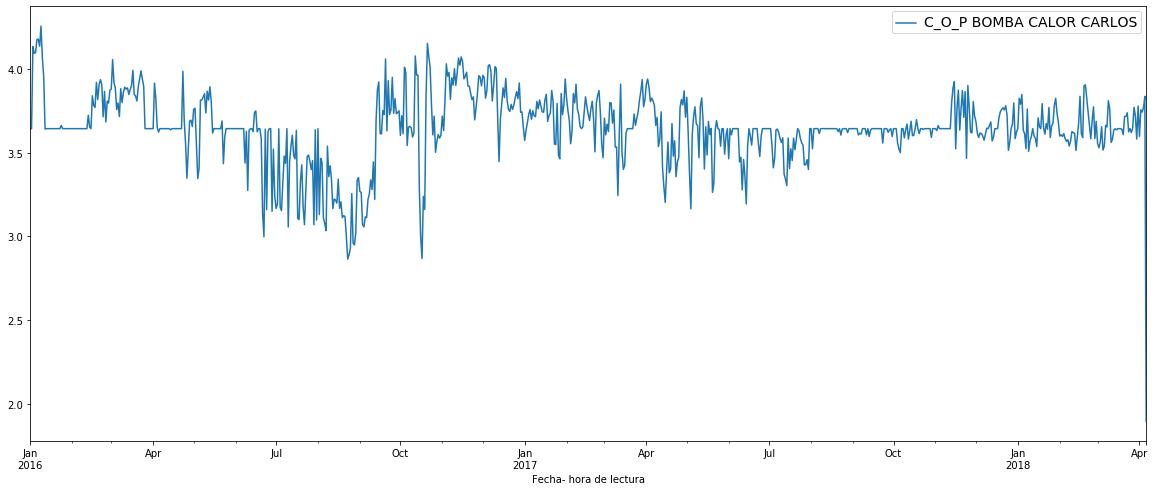

In [6]:
plot = dataTemporal1['C_O_P BOMBA CALOR CARLOS'].plot(figsize=(20, 8))
legend = plt.legend()
legend.prop.set_size(14);

## Modelos de Clasificación

### Etiquetado

In [7]:
dataClasificacion["label_cop_carlos"] = (dataClasificacion["C_O_P BOMBA CALOR CARLOS"] > 3.5) & (dataClasificacion["C_O_P BOMBA CALOR CARLOS"] < 4.5)
dataClasificacion["label_cop_felipe"] = (dataClasificacion["C_O_P BOMBA CALOR FELIPE"] > 3.5) & (dataClasificacion["C_O_P BOMBA CALOR FELIPE"] < 4.5)
dataClasificacion["label_cop_frio_1"] = (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 1"] > 3.5) & (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 1"] < 4.5)
dataClasificacion["label_cop_frio_2"] = (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 2"] > 3.5) & (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 2"] < 4.5)
dataClasificacion.head()

variables = ["Fecha- hora de lectura", "C_O_P BOMBA CALOR CARLOS", "C_O_P BOMBA CALOR FELIPE", "C_O_P MÁQUINA GRUPO FRÍO 1", "C_O_P MÁQUINA GRUPO FRÍO 2", 
            "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]

dataTest = dataClasificacion[variables]
dataTest.head()

,Fecha- hora de lectura,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,label_cop_carlos,label_cop_felipe,label_cop_frio_1,label_cop_frio_2
0,2016-01-01 00:00:00,3.587883,3.284228,8.099650,10.114581,True,False,False,False
1,2016-01-01 00:15:00,3.643607,3.356352,8.099650,5.319872,True,False,False,False
2,2016-01-01 00:30:00,3.643607,3.356352,4.030735,10.114581,True,False,True,False
3,2016-01-01 00:45:00,3.643607,3.356352,4.101076,3.683874,True,False,True,True
4,2016-01-01 01:00:00,3.643607,3.356352,3.959458,3.543089,True,False,True,True


### Árbol de decisión

In [8]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def treeClassifier(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    
    # Instantiate mode
    model = tree.DecisionTreeClassifier()
    # Train the model on training data
    model.fit(X_train, y_train)
    # Usar modelo entrenado
    predicts = model.predict(X_test)
    # exactitud
    acc = accuracy_score(y_test, predicts)
    # Precision
    pre = precision_score(y_test, predicts)
    # Sensibilidad
    sen = recall_score(y_test, predicts)
    # Puntaje F1
    f1 = f1_score(y_test, predicts)
    # Matriz de confusion
    confusionMatrix = pd.DataFrame(
        confusion_matrix(y_test, predicts),
        columns=['Predijo dentro del rango', 'Predicted fuera del rango'],
        index=['Dentro del rango', 'Fuera del rango']
    )
    print("exactitud: ", acc)
    print("Precision: ", pre)
    print("Sensibilidad: ", sen)
    print("Puntaje F1: ", f1)
    print("Matriz de confusion:\n", confusionMatrix)
    #print(predicts.tolist())
    return model

#### label_cop_frio_1

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.999755441428222
Puntaje F1:  0.9998777057600587
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     19697                          0
Fuera del rango                          1                       4088


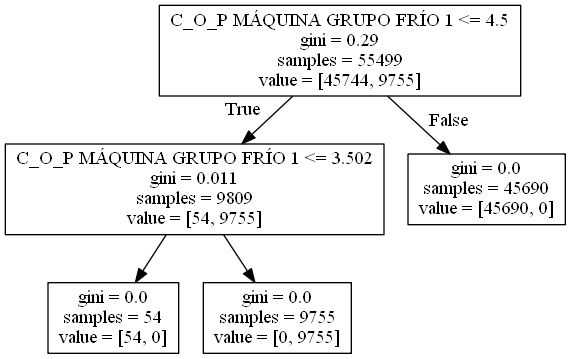

In [9]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_1"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_frio_1.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_frio_1.dot -o tree_frio_1.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_frio_1.png')

#### label_cop_frio_2

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.9998545031281827
Puntaje F1:  0.9999272462713714
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     16913                          0
Fuera del rango                          1                       6872


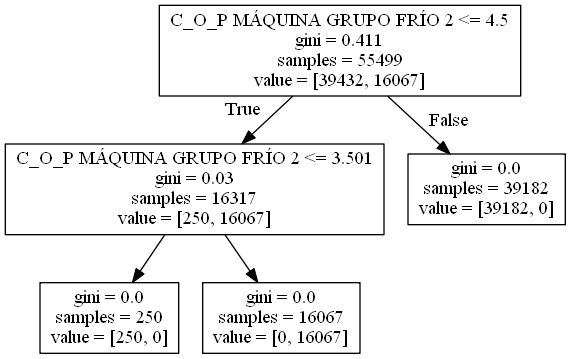

In [33]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_2"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_frio_2.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_frio_2.dot -o tree_frio_2.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_frio_2.png')

#### label_cop_carlos

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.9999514610232016
Puntaje F1:  0.9999757299225784
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                      3184                          0
Fuera del rango                          1                      20601


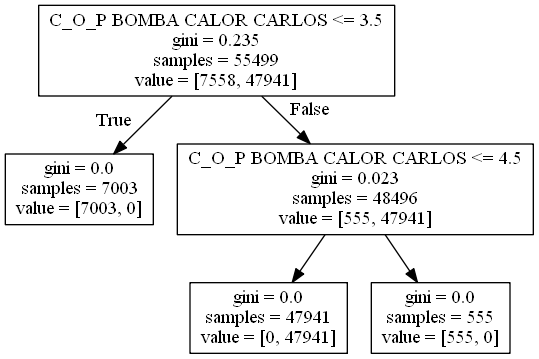

In [11]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_carlos"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_carlos.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_carlos.dot -o tree_carlos.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_carlos.png')

#### label_cop_felipe

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.9997224535109631
Puntaje F1:  0.9998612074947952
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     20183                          0
Fuera del rango                          1                       3602


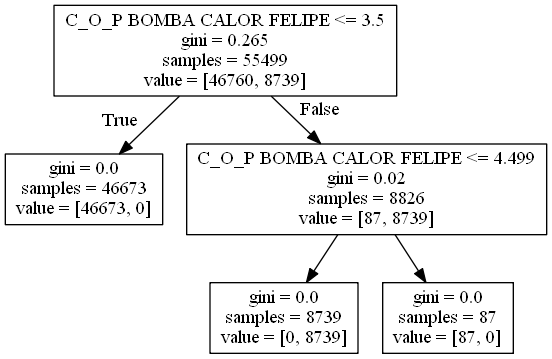

In [34]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_felipe"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_felipe.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_felipe.dot -o tree_felipe.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_felipe.png')

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def randomForestClassifier(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    
    # Instantiate model with 100 decision trees
    rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    #Predecimos para los valores del grupo Test
    predicts = rf.predict(X_test)
    # Matriz de confusion
    confusionMatrix = pd.DataFrame(
        confusion_matrix(y_test, predicts),
        columns=['Predijo dentro del rango', 'Predicted fuera del rango'],
        index=['Dentro del rango', 'Fuera del rango']
    )    
    # exactitud
    acc = accuracy_score(y_test, predicts)
    # Precision
    pre = precision_score(y_test, predicts)
    # Sensibilidad
    sen = recall_score(y_test, predicts)
    # Puntaje F1
    f1 = f1_score(y_test, predicts)
    
    print("exactitud: ", acc)
    print("Precision: ", pre)
    print("Sensibilidad: ", sen)
    print("Puntaje F1: ", f1)
    print("Matriz de confusion:\n", confusionMatrix)
    
    #Para obtener la importancia de cada variable inicializamos el  ExtraTreesClassifier
    model = ExtraTreesClassifier()
    #Ajustamos el modelo
    model.fit(X_train, y_train)
    #Pedimos que nos muestre la importancia de cada variable
    print("Importancia de cada variable del dataset\n", model.feature_importances_)
    #Para dibujar todos las variables con su importancia
    from matplotlib import pyplot
    pyplot.barh(range(len(model.feature_importances_)), model.feature_importances_, align='center')
    x = X.columns
    x_pos = [i for i, _ in enumerate(x)]
    pyplot.yticks(x_pos, x)
    pyplot.show()
    
    return rf

#### label_cop_frio_1

exactitud:  0.9999159169259229
Precision:  0.9995296331138288
Sensibilidad:  1.0
Puntaje F1:  0.9997647612326511
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     19534                          2
Fuera del rango                          0                       4250


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00838499 0.01094414 0.02339757 0.02091014 0.01419148 0.02617411
 0.00739494 0.00869271 0.00852891 0.01022217 0.01759097 0.01634104
 0.16894884 0.01877463 0.0264674  0.01967582 0.01886521 0.00766466
 0.30797159 0.02314654 0.00389915 0.00459752 0.01659987 0.02293026
 0.00805064 0.00965833 0.05799733 0.0133411  0.01707053 0.00999895
 0.05685677 0.01471169]


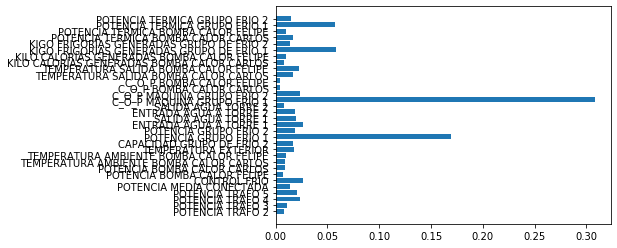

In [14]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_1"]

rf = randomForestClassifier(X, y)

#### label_cop_frio_2

exactitud:  0.9998738753888842
Precision:  0.9997081144191476
Sensibilidad:  0.9998540359071668
Puntaje F1:  0.9997810698387214
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     16933                          2
Fuera del rango                          1                       6850


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00923031 0.00587921 0.03085866 0.01654368 0.02765061 0.01982351
 0.01184004 0.00678702 0.01424011 0.00974139 0.01427841 0.10152509
 0.03413475 0.12787337 0.02337423 0.01249025 0.04374921 0.01410967
 0.01909227 0.13563507 0.00258307 0.00392852 0.01633222 0.02521102
 0.00730145 0.00948596 0.0381466  0.07668006 0.0090791  0.00570777
 0.04991128 0.07677607]


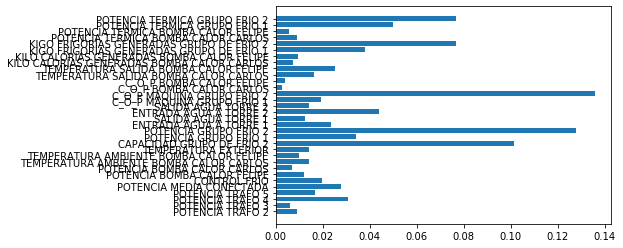

In [15]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_2"]

rf = randomForestClassifier(X, y)

#### label_cop_carlos

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.9999513855128829
Puntaje F1:  0.999975692165585
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                      3216                          0
Fuera del rango                          1                      20569


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00764816 0.00595887 0.00876613 0.01666532 0.01340736 0.00616805
 0.01308343 0.09218078 0.02848045 0.04055331 0.02734849 0.01125402
 0.01101989 0.02575413 0.00586654 0.00731252 0.00891264 0.00752575
 0.00510162 0.01315341 0.31790793 0.00983108 0.08175689 0.01395321
 0.1059819  0.01106674 0.00833164 0.00572615 0.05959959 0.00959451
 0.00920365 0.01088584]


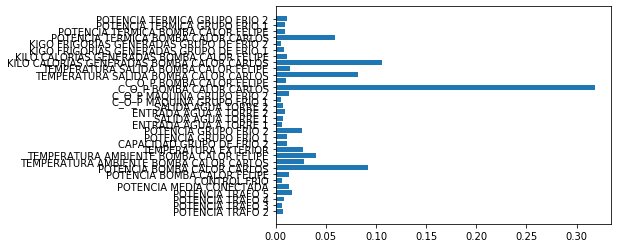

In [16]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_carlos"]

rf = randomForestClassifier(X, y)

#### label_cop_felipe

exactitud:  0.9996216261666526
Precision:  0.9986515641855448
Sensibilidad:  0.9989209603452927
Puntaje F1:  0.9987862440997977
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     20074                          5
Fuera del rango                          4                       3703


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00825376 0.00698634 0.01134788 0.01213982 0.01897391 0.00774353
 0.11173509 0.02043608 0.02021608 0.0298806  0.02434388 0.00806518
 0.01245656 0.01072901 0.00871203 0.00820863 0.00704302 0.00673571
 0.00437326 0.00828168 0.01696388 0.32466554 0.01215573 0.04628314
 0.01417271 0.10913396 0.01090328 0.0092813  0.01485238 0.08024449
 0.00736253 0.00731902]


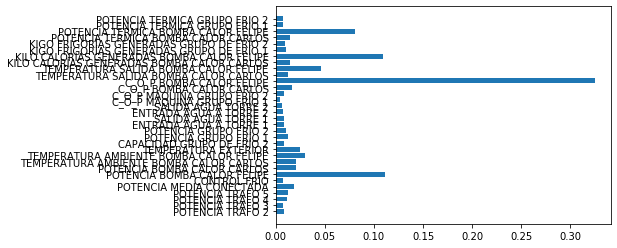

In [17]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_felipe"]

rf = randomForestClassifier(X, y)

## Modelos de Prediccion

### MLP

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def mLPRegressor(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    mlp = MLPRegressor(activation='logistic', solver='lbfgs')
    mlp.fit(X_train, y_train)
    predicts = mlp.predict(X_test)
    acc = mlp.score(X_test, y_test)
    # Error cuadratico
    mse = mean_squared_error(y_test, predicts)
    print("Accuracy: ", acc)
    print("MSE: ", mse)
    #print(predicts.tolist())
    return mlp

#### C_O_P MÁQUINA GRUPO FRÍO 1

In [19]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P MÁQUINA GRUPO FRÍO 1"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7158084028318472
MSE:  0.2450667566022717


#### C_O_P MÁQUINA GRUPO FRÍO 2

In [20]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P MÁQUINA GRUPO FRÍO 2"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.8446550625635134
MSE:  0.38426918811696525


#### C_O_P BOMBA CALOR CARLOS

In [21]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 
                 'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR CARLOS']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P BOMBA CALOR CARLOS"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7525295390781807
MSE:  0.03502068165811236


#### C_O_P BOMBA CALOR FELIPE

In [22]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 
                 'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR FELIPE']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P BOMBA CALOR FELIPE"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7134605882819074
MSE:  0.023402507836310107


### Gradient Boosting Regressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

def gradientBoostingRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    est = GradientBoostingRegressor()
    est.fit(X_train, y_train)
    predicts = est.predict(X_test)
    acc = est.score(X_test, y_test)
    mse = mean_squared_error(y_test, predicts)
    print("Accuracy: ", acc)
    print("MSE: ", mse)
    return est

#### C_O_P MÁQUINA GRUPO FRÍO 1

In [24]:
X = dataPrediccion[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
y = dataPrediccion['C_O_P MÁQUINA GRUPO FRÍO 1']
estGrupoFrio1 = gradientBoostingRegressor(X, y)

Accuracy:  0.8050331309360326
MSE:  0.1698468620698166


#### C_O_P MÁQUINA GRUPO FRÍO 2

In [25]:
X = dataPrediccion[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
y = dataPrediccion['C_O_P MÁQUINA GRUPO FRÍO 2']
estGrupoFrio2 = gradientBoostingRegressor(X, y)

Accuracy:  0.8868133865439795
MSE:  0.277819618125443


#### C_O_P BOMBA CALOR CARLOS

In [26]:
X = dataPrediccion[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
y = dataPrediccion['C_O_P BOMBA CALOR CARLOS']
estCalorCarlos = gradientBoostingRegressor(X, y)

Accuracy:  0.7302246875458106
MSE:  0.038265083702170175


#### C_O_P BOMBA CALOR FELIPE

In [27]:
X = dataPrediccion[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
y = dataPrediccion['C_O_P BOMBA CALOR FELIPE']
estCalorFelipe = gradientBoostingRegressor(X, y)

Accuracy:  0.653479916797856
MSE:  0.027757649248919405
